# Лабораторная работа №2
**Максимовой Елизаветы,** 
**14ПМИ**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Загружаем данные для анализа,** проводим необходимую обработку данных: удаляем не нужные и сильно коррелированные признаки, отделяем столбец с значением класса от таблицы атрибутов объектов, производим нормализацию данных, делим выборку на тренировочную и тестовую (более подробный анализ и первичная обработка данных представлены в лабораторной работе №1 https://github.com/maksimovVva/Analysis/blob/master/Maksimova_lab1.ipynb)

In [53]:
data = pd.read_csv('leaf.csv', sep = ',', engine = 'python', header=None)
data.columns = [u'Class', u'Specimen Number', u'Eccentricity', u'Aspect Ratio', u'Elongation',
       u'Solidity', u'Stochastic Convexity', u'Isoperimetric Factor', u'Maximal Indentation Depth', u'Lobedness',
       u'Average Intensity', u'Average Contrast', u'Smoothness', u'Third moment', u'Uniformity', u'Entropy']
data.head()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


Attribute Information:
    1. Class (Species) 
    2. Specimen Number 
    3. Eccentricity 
    4. Aspect Ratio 
    5. Elongation 
    6. Solidity 
    7. Stochastic Convexity 
    8. Isoperimetric Factor 
    9. Maximal Indentation Depth 
    10. Lobedness 
    11. Average Intensity 
    12. Average Contrast 
    13. Smoothness 
    14. Third moment 
    15. Uniformity 
    16. Entropy
    
This dataset was created by Pedro F. B. Silva and AndrÃ© R. S. MarÃ§al using leaf specimens collected by Rubim Almeida da Silva at the Faculty of Science, University of Porto, Portugal.

This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species.

The task of prediction is to determine the type of plant according to the characteristics of the leaves

In [54]:
data = data.drop('Average Intensity', axis = 1)\
           .drop('Smoothness', axis = 1)\
           .drop('Specimen Number', axis = 1)
y = data['Class']
X = data.drop(('Class'), axis = 1)
print(X.shape)
print(y.shape)

(340, 12)
(340,)


In [55]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-7.836868e-17,1.025324e-16,1.182714e-15,2.612289e-15,3.811330e-15,5.956020e-16,9.404242e-17,3.160870e-16,-8.228712e-17,2.089832e-16,2.559227e-16,-1.320839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.893625e+00,-5.515916e-01,-2.076615e+00,-3.652049e+00,-4.757231e+00,-2.081802e+00,-8.945736e-01,-5.024633e-01,-1.757048e+00,-1.076344e+00,-8.814640e-01,-1.698253e+00
25%,-8.123989e-01,-4.728318e-01,-8.392240e-01,-1.176756e-01,1.950257e-01,-8.477669e-01,-7.212939e-01,-4.880009e-01,-7.939332e-01,-7.268709e-01,-6.604173e-01,-7.587023e-01
50%,2.092823e-01,-3.345309e-01,-6.087142e-02,3.835711e-01,4.275402e-01,2.203195e-01,-3.495692e-01,-4.042074e-01,-9.949592e-02,-2.797381e-01,-3.442725e-01,-1.456430e-01
75%,8.412579e-01,-3.736376e-02,6.115670e-01,6.345107e-01,4.885590e-01,7.791005e-01,2.719098e-01,-1.033170e-01,7.570472e-01,4.494055e-01,2.988933e-01,6.701592e-01
max,1.338651e+00,6.386117e+00,2.221971e+00,7.826495e-01,4.885590e-01,1.502892e+00,4.190168e+00,6.427570e+00,3.013427e+00,4.506561e+00,5.907140e+00,2.643174e+00


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape

**Обучаем классификатор:**


In [57]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Классифицируем некоторый объект под индексом "30" из тестовой выборки:

In [58]:
No = 30
leaf = X_test[No:No+1]
cls = y_test[No:No+1]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
80,1.28839,1.809047,1.773823,0.546692,0.442838,-1.203152,-0.405642,-0.421459,-0.721695,-0.684196,-0.670519,-0.723309


In [59]:
cls

80    8
Name: Class, dtype: int64

In [60]:
mlp_model.predict(leaf)

array([8], dtype=int64)

На данном объекте классификатор сработал правильно!

**Проверяем качество классификатора:**

In [61]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Посчитаем ошибки на обучающей и тестовой выборках:

In [62]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.313725490196


# Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha

Способ 1: при помощи цикла

In [63]:
alpha_arr = np.logspace(-3, 2, 60)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разными значениями alpha:

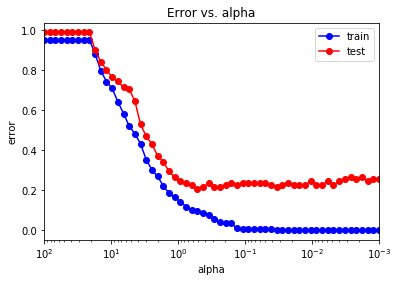

In [64]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Получаем, что в данном диапозоне значений alpha минимальные ошибки на тренировочной и тестовой выборке равны:

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.205882352941


а оптимальные значения alpha равны:

In [66]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.51506781]


In [67]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном _оптимальном_ значении `alpha`:

Повторим обучение с заданным параметром alpha:

In [100]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.225490196078


Способ 2: при помощи GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [85]:
alphArray = np.logspace(-3, 2, 60)
mlp_modelCV = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
cv = GridSearchCV(mlp_modelCV, {'alpha': alphArray}, cv=4)
cv.fit(X_train, y_train)
print("Best \"alpha\"=",cv.best_params_['alpha'])

Best "alpha"= 0.00855467253557


Получив оптимальное значение alpha строим классификатор:

In [86]:
alpha_opt = cv.best_params_['alpha']
mlp_modelCV = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_modelCV.fit(X_train, y_train)

y_train_predCV = mlp_modelCV.predict(X_train)
y_test_predCV = mlp_modelCV.predict(X_test)
print(np.mean(y_train != y_train_predCV))
print(np.mean(y_test != y_test_predCV))

0.0
0.225490196078


## Матрица рассогласования:

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0

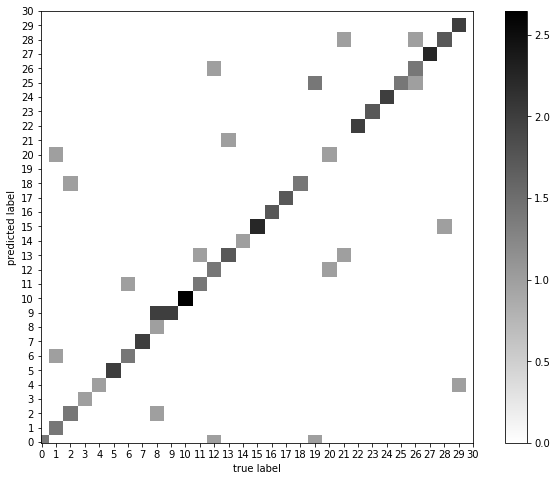

In [103]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.axes([1.5, 1.5, 1.5, 1.5])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(31))
plt.yticks(range(31))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

## Другие метрики качества:

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          1       0.50      1.00      0.67         2
          2       1.00      0.50      0.67         4
          3       0.67      0.67      0.67         3
          4       1.00      1.00      1.00         1
          5       0.50      1.00      0.67         1
          6       1.00      1.00      1.00         4
          7       0.67      0.67      0.67         3
          8       1.00      1.00      1.00         4
          9       1.00      0.17      0.29         6
         10       0.50      1.00      0.67         4
         11       1.00      1.00      1.00         7
         12       0.67      0.67      0.67         3
         13       0.67      0.50      0.57         4
         14       0.60      0.75      0.67         4
         15       1.00      1.00      1.00         1
         22       0.83      1.00      0.91         5
         23       1.00      1.00      1.00         3
         24       1.00      1.00      1.00   

C:\Users\maks_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 




## Все ошибки:

Выведем все объекты с атрибутами, для которых классификатор не смог правильно определить класс

In [155]:
for i in range(N_test):
    leaf = X_test[i:i+1]
    cls = y_test[i:i+1]
    cls_pred = mlp_model.predict(leaf)
    if cls_pred[0] != cls.values[0]:
        print("\nWrong class = ",cls_pred[0], "\nObject: ", leaf.head())


Wrong class =  14 
Object:       Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
129      0.917262       0.06856     0.60639  0.213908              0.412329   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
129             -0.070765                  -0.421352  -0.426002   

     Average Contrast  Third moment  Uniformity   Entropy  
129          0.042908     -0.229295   -0.160354  0.290107  

Wrong class =  32 
Object:       Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
217      0.517955     -0.230166   -0.133296  0.607753              0.473348   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
217              0.702502                  -0.548403  -0.457985   

     Average Contrast  Third moment  Uniformity  Entropy  
217         -0.705208     -0.559605   -0.738126 -0.82224  

Wrong class =  10 
Object:      Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
84     -0